# Penyelesaian Tugas Deep Learning menggunakan PyTorch and TensorFlow (Week 1, Dataset Infrared)

# Persiapan: Pemuatan dan Preprocessing Data

## 1. Menginstal atau Memastikan Instalasi PyTorch, Tensorflow dan Modul Pendukung Seperti NumPy dan Pandas

In [84]:
%pip install pandas numpy matplotlib scikit-learn torch tensorflow

Note: you may need to restart the kernel to use updated packages.


## 2. Mengimpor Library yang Dibutuhkan

In [85]:
import pandas as pd # untuk membaca data dari file csv
import numpy as np # untuk operasi matematika
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder # untuk mengubah label kelas menjadi angka
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Memuat Dataset ke Dalam Program

In [86]:
data = pd.read_csv('./Infrared.csv').dropna() # membaca data dari file csv
data.sample(10) # menampilkan 10 baris data secara acak

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
717,Female,21-25,White,24.2,18.1,0.60,0.875000,35.657500,35.612500,34.392500,...,34.260000,33.8475,33.6875,34.295000,35.1825,34.8225,35.872500,35.425000,35.447500,36.89
113,Female,18-20,White,22.6,16.5,0.78,0.790000,35.283333,35.513333,34.426667,...,34.043333,34.2600,33.8000,34.366667,35.1600,34.7500,35.903333,35.800000,35.826667,37.24
270,Female,18-20,Hispanic/Latino,22.3,35.9,0.70,0.670000,36.195000,36.012500,35.672500,...,35.015000,34.9800,35.0150,35.202500,35.6000,35.5650,36.555000,36.535000,36.555000,37.09
344,Male,18-20,White,21.8,25.3,0.78,0.712500,35.820000,35.642500,35.472500,...,34.392500,34.3825,34.5225,34.800000,35.1625,35.0050,36.027500,35.550000,35.577500,37.59
638,Female,18-20,White,23.9,23.5,0.60,1.185000,35.877500,36.002500,35.235000,...,34.547500,34.8625,34.8275,34.885000,35.1675,35.1400,36.040000,35.732500,35.760000,36.94
262,Male,18-20,White,25.6,24.8,0.68,1.255000,37.472500,37.175000,36.977500,...,35.712500,35.7900,35.7850,36.040000,36.4650,36.3475,37.632500,37.470000,37.495000,38.49
624,Male,18-20,White,22.0,30.0,0.60,0.930000,35.397500,35.880000,34.262500,...,32.947500,32.7675,32.6225,32.600000,34.8000,33.9525,36.435000,36.380000,36.435000,37.44
926,Female,21-25,Asian,23.8,16.7,0.70,0.632500,34.872500,34.732500,34.187500,...,34.155000,34.3300,33.8275,34.055000,34.8725,34.4950,35.472500,35.425000,35.472500,36.49
560,Male,18-20,White,26.1,24.3,0.60,0.893333,36.873333,36.426667,36.390000,...,36.120000,35.7300,36.2200,36.473333,36.8900,36.5600,36.943333,36.323333,36.343333,37.94
366,Male,26-30,Black or African-American,22.7,53.4,0.72,1.307500,34.882500,35.302500,34.372500,...,34.610000,34.3625,34.4075,33.890000,35.1650,34.7925,35.760000,35.690000,35.730000,37.14


In [87]:
data.describe() # menampilkan statistik data

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,...,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,24.115815,28.749411,0.729784,0.968991,35.596374,35.611651,34.888828,35.012899,35.659874,35.587022,...,34.568583,34.565945,34.488836,34.578310,35.422130,35.094648,36.084615,35.805225,35.837984,37.028163
std,1.337617,13.070900,2.456486,0.362860,0.575436,0.550265,0.719114,0.633228,0.554440,0.569827,...,0.669346,0.678941,0.667293,0.728353,0.523703,0.576283,0.492236,0.559755,0.559812,0.509743
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.270625,34.457500,34.655625,35.332500,35.248125,...,34.181250,34.178125,34.097500,34.226875,35.118750,34.758125,35.775000,35.473125,35.500000,36.752500
50%,24.000000,26.300000,0.620000,0.940000,35.547500,35.575000,34.915000,34.997500,35.602500,35.531250,...,34.597500,34.602500,34.512917,34.622500,35.392500,35.100000,36.027500,35.788750,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.884375,35.300000,35.364375,35.911875,35.856875,...,34.969375,34.965000,34.879375,35.012500,35.675000,35.415000,36.280000,36.087500,36.121875,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


## 4. Mengonversi dan Menormalisasi Data

In [88]:
# Mengubah data kategorikal menjadi angka
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender']) # Mengubah label 'Gender' menjadi angka
data['Age'] = label_encoder.fit_transform(data['Age']) # Mengubah label 'Age' menjadi angka
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity']) # Mengubah label 'Ethnicity' menjadi angka

# Memisahkan kolom yang digunakan sebagai fitur dan label
X = data.drop("aveOralM", axis=1).values
y = data["aveOralM"].values.reshape(-1, 1)

print(X, y) # menampilkan data fitur dan label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 1.      5.      5.     ... 35.6925 35.635  35.6525]
 [ 0.      4.      2.     ... 35.175  35.0925 35.1075]
 [ 0.      2.      5.     ... 35.9125 35.86   35.885 ]
 ...
 [ 0.      0.      2.     ... 36.535  35.965  35.9975]
 [ 1.      3.      3.     ... 35.86   35.415  35.435 ]
 [ 0.      0.      5.     ... 35.9725 35.89   35.9175]] [[36.59]
 [37.19]
 [37.34]
 ...
 [37.59]
 [37.29]
 [37.19]]


## 5. Mempersiapkan Rumus Evaluasi (MSE, RMSE, RSquared)

In [89]:
# Fungsinya untuk menghitung metrik evaluasi
# Metrik evaluasi yang digunakan adalah Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R^2
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2) # Mean Squared Error
    rmse = np.sqrt(mse) # Root Mean Squared Error
    ss_res = np.sum((y_true - y_pred) ** 2) # Sum of Squared Residuals (SSR)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) # Total Sum of Squares (SST)
    r2 = 1 - ss_res / ss_tot # R^2, yaitu 1 - (SSR/SST)\

    return mse, rmse, r2

## 6. Membuat Fungsi Visualisasi

In [90]:
# Fungsinya untuk menampilkan plot hasil prediksi
def visualize_results(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.show()

# Fungsinya untuk menampilkan plot hasil training model 
def visualize_training(history):
    plt.plot(history['loss'])
    plt.yscale('log')
    plt.title('Model loss')
    plt.ylabel('Loss (log scale)')
    plt.xlabel('Epoch')
    plt.legend(['Loss'], loc='upper left')
    plt.show()

# A. Deep Learning dengan PyTorch

## 1. Mengimpor Library yang Dibutuhkan

In [91]:
import torch
import torch.nn as nn # untuk membuat model neural network dengan pytorch
import torch.optim as optim # untuk mengoptimalkan model neural network

## 2. Mengonversi Dataset Menjadi Tipe Tensor PyTorch

In [92]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Mengubah data latih menjadi tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32) # Mengubah label data latih menjadi tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) # Mengubah data uji menjadi tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.float32) # Mengubah label data uji menjadi tensor

## 3. Menyusun Model Neural Network Sederhana


In [93]:
# Mendefinisikan model sederhana (Multi-Layer Perceptron)
class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model = SimpleNN(input_dim, hidden_dim, output_dim) # Membuat model

## 4. Menyiapkan Optimizer dan Loss Function

In [94]:
criterion = nn.MSELoss() # Menggunakan Mean Squared Error sebagai loss function
optimizer = optim.Adam(model.parameters(), lr=0.01) # Menggunakan Adam sebagai optimizer

## 5. Melatih Model

In [95]:
# Melatih model
num_epochs = 1000 # Jumlah iterasi pelatihan
history = pd.DataFrame() # Menyimpan statistik pelatihan

for epoch in range(num_epochs):
    optimizer.zero_grad() # Mengatur gradien menjadi 0 sebelum melakukan backpropagation
    y_pred = model(X_train_tensor) # Memprediksi data latih
    loss = criterion(y_pred, y_train_tensor) # Menghitung loss
    loss.backward() # Backpropagation
    optimizer.step() # Update bobot

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Menyimpan statistik pelatihan untuk menampilkan plot
    history = pd.concat([history, pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})], ignore_index=True)

Epoch 0, loss=653.805419921875
Epoch 100, loss=0.13129185140132904
Epoch 200, loss=0.12121959030628204
Epoch 300, loss=0.1172395721077919
Epoch 400, loss=0.11363954842090607
Epoch 500, loss=0.11045172065496445
Epoch 600, loss=0.10762377083301544
Epoch 700, loss=0.10509370267391205
Epoch 800, loss=0.10283565521240234
Epoch 900, loss=0.10081641376018524


## 6. Mengevaluasi Model dengan Menghitung MSE, RMSE, dan RSquared

In [96]:
model.eval() # Mengubah model menjadi mode evaluasi
y_pred = model(X_test_tensor) # Memprediksi data uji

# Menghitung metrik evaluasi
mse, rmse, r2 = calculate_metrics(y_test, y_pred.detach().numpy())
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

MSE: 0.09731801939071563, RMSE: 0.3119583616297464, R^2: 0.5107719084350422


## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

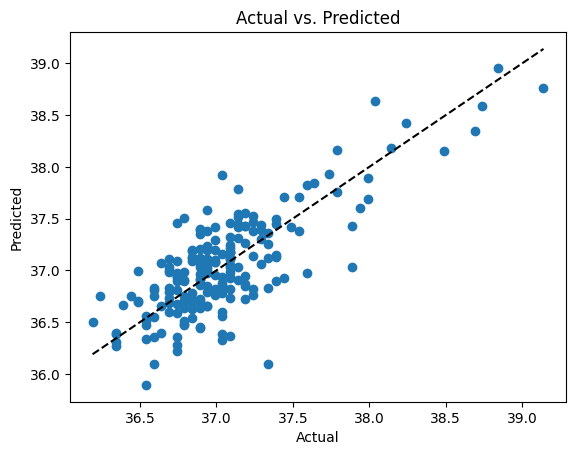

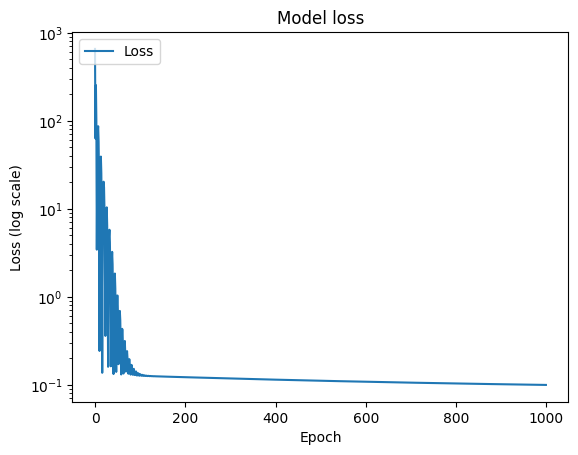

In [97]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred.detach().numpy())

# Menampilkan plot hasil training
visualize_training(history)

# Menyimpan model
torch.save(model.state_dict(), 'model_pytorch_infrared.pth')

# B. Deep Learning dengan TensorFlow

## 1. Import Library yang Dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # untuk membuat model neural network
from tensorflow.keras.layers import Dense, Input # untuk menambah layer pada model

## 2. Penyusunan Model Neural Network


In [99]:
# Menentukan hyperparameter model
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model_tf = Sequential([
    Input(shape=(input_dim,)), # Input layer
    Dense(hidden_dim, activation='relu') , # Layer input 128 neuron
    Dense(output_dim)  # Layer output 1 neuron
])

## 3. Kompilasi Model

In [100]:
# Kompilasi model
model_tf.compile(optimizer='adam', loss='mse')

## 4. Pelatihan Model

In [101]:
# Melatih model
history = model_tf.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 593.6766    
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.2017 
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5017 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3664 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2562 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2199 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1670 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1552 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1525
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1567 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1444 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1640 
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1492 
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1592 
Epoch 15/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

## 5. Evaluasi model dengan menghitung MSE, RMSE, dan RSquared

In [102]:
# Memprediksi data uji
y_pred = model_tf.predict(X_test)

# Menghitung metrik evaluasi
mse, rmse, r2 = calculate_metrics(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MSE: 0.1047392954135692, RMSE: 0.3236345089967527, R^2: 0.4734643601683559


## 6. Memvisualisasikan Prediksi dari model yang telah dilatih

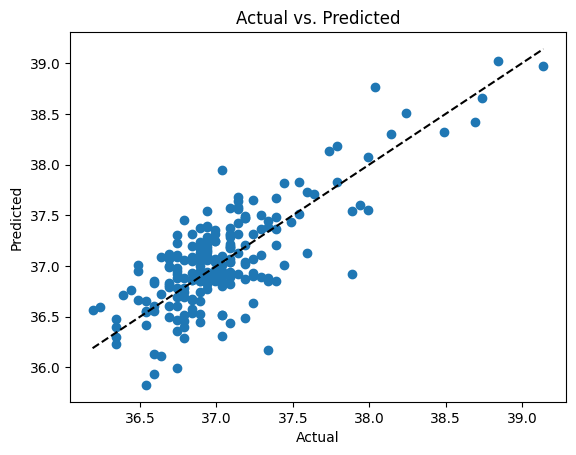

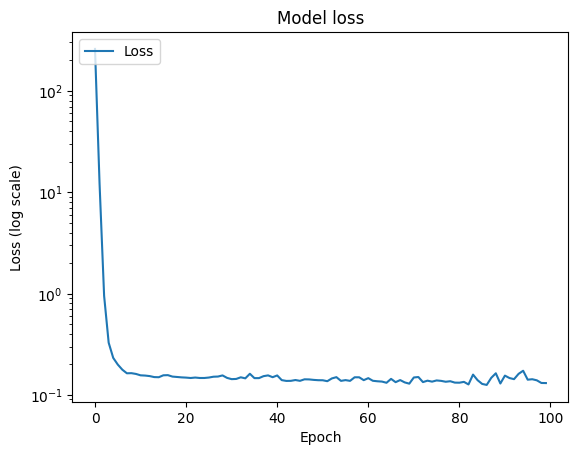

In [103]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred)

# Menampilkan plot hasil training
visualize_training(history.history)

# Menyimpan model
model_tf.save('model_tensorflow_infrared.keras')

## **🔍 Penjelasan Lengkap Persamaan dalam Implementasi Deep Learning**

Dalam implementasi deep learning, terdapat beberapa komponen utama yang melibatkan persamaan matematis. Kita akan membahasnya secara sistematis mulai dari forward pass, fungsi aktivasi, backward pass (backpropagation), fungsi loss, dan optimisasi**.

---

# **1️⃣ Forward Pass (Propagasi Maju)**
Forward pass adalah proses perhitungan dari **input hingga output**. Ini melibatkan bobot, bias, dan fungsi aktivasi.

## **a) Perhitungan Linear di Setiap Lapisan**
Setiap neuron dalam jaringan saraf menerima input, mengalikannya dengan bobot, menambahkan bias, lalu melewatkannya ke fungsi aktivasi.

$$ z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} $$

🔹 **Variabelnya:**
- \( W^{(l)} \) = matriks bobot pada lapisan ke-\(l\)
- \( a^{(l-1)} \) = output dari lapisan sebelumnya
- \( b^{(l)} \) = bias pada lapisan ke-\(l\)
- \( z^{(l)} \) = hasil linear sebelum masuk fungsi aktivasi  

📌 **Fungsi ini mirip dengan regresi linear!** Tetapi dalam deep learning, hasilnya akan dilewatkan ke fungsi aktivasi.

---

# **2️⃣ Fungsi Aktivasi**
Setelah \( z^{(l)} \) dihitung, kita menerapkan fungsi aktivasi. Fungsi ini menentukan apakah suatu neuron **aktif atau tidak**.

## ReLU (Rectified Linear Unit)**
\[
f(z) = \max(0, z)
\]
📌 **Fungsi ini hanya melewatkan nilai positif**, sementara nilai negatif diubah menjadi nol, membantu menghindari **vanishing gradient**.

---

# **3️⃣ Backpropagation (Propagasi Balik)**
Backpropagation digunakan untuk menghitung **gradien** dan memperbarui bobot dengan cara menurunkan loss.

## **a) Menghitung Gradien dari Loss**
Menggunakan aturan rantai:
\[
\frac{\partial L}{\partial W^{(l)}} = \frac{\partial L}{\partial a^{(l)}} \cdot \frac{\partial a^{(l)}}{\partial z^{(l)}} \cdot \frac{\partial z^{(l)}}{\partial W^{(l)}}
\]

**Variabelnya:**
- \( L \) = fungsi loss
- \( W^{(l)} \) = bobot pada lapisan ke-\(l\)
- \( a^{(l)} \) = output dari lapisan ke-\(l\)
- \( z^{(l)} \) = input sebelum aktivasi di lapisan ke-\(l\)

---

# **4️⃣ Fungsi Loss**
Fungsi loss mengukur seberapa baik model melakukan prediksi.

Pada model regresi ini, fungsi loss yang digunakan adalah Mean Squared Error (MSE)

---

# **5️⃣ Optimisasi Bobot dengan Gradient Descent**
Bobot diperbarui dengan **Gradient Descent**.

\[
W' = W - \alpha \frac{\partial L}{\partial W}
\]

📌 **Di sini, bobot diperbarui dengan mengurangi gradien loss terhadap bobot.**

### **a) Adam Optimizer**
Adam adalah pengembangan dari gradient descent yang menggunakan **momentum** dan **adaptive learning rate**.

\[
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \frac{\partial L}{\partial W}
\]

\[
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \left( \frac{\partial L}{\partial W} \right)^2
\]

\[
W' = W - \frac{\alpha}{\sqrt{v_t} + \epsilon} m_t
\]

📌 Adam lebih stabil dan lebih cepat dibandingkan gradient descent biasa.


## Penjelasan Persamaan Matematika untuk Evaluasi

### Mean Squared Error (MSE)
Mean Squared Error (MSE) adalah rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. MSE digunakan untuk mengukur seberapa baik model memprediksi nilai target. Rumusnya adalah:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

di mana:
- $ n $ adalah jumlah data
- $ y_i $ adalah nilai aktual
- $ \hat{y}_i $ adalah nilai prediksi

### Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. RMSE memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan nilai target. Rumusnya adalah:

$$ \text{RMSE} = \sqrt{\text{MSE}} $$

### R-squared (R²)
R-squared (R²) adalah proporsi variansi dalam variabel dependen yang dapat dijelaskan oleh variabel independen dalam model. R² memberikan indikasi seberapa baik model cocok dengan data. Rumusnya adalah:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

di mana:
- $ y_i $ adalah nilai aktual
- $ \hat{y}_i $ adalah nilai prediksi
- $ \bar{y} $ adalah rata-rata nilai aktual

### Sum of Squared Residuals (SSR)
Sum of Squared Residuals (SSR) adalah jumlah dari kuadrat selisih antara nilai aktual dan nilai prediksi. SSR digunakan dalam perhitungan R². Rumusnya adalah:

$$ \text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

### Total Sum of Squares (SST)
Total Sum of Squares (SST) adalah jumlah dari kuadrat selisih antara nilai aktual dan rata-rata nilai aktual. SST digunakan dalam perhitungan R². Rumusnya adalah:

$$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$